In [19]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
boston = load_boston()

c:\Users\tomis\anaconda3\envs\tomislaw_tarnawski\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [20]:
print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

In [21]:
X = boston.data
y = boston.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [23]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

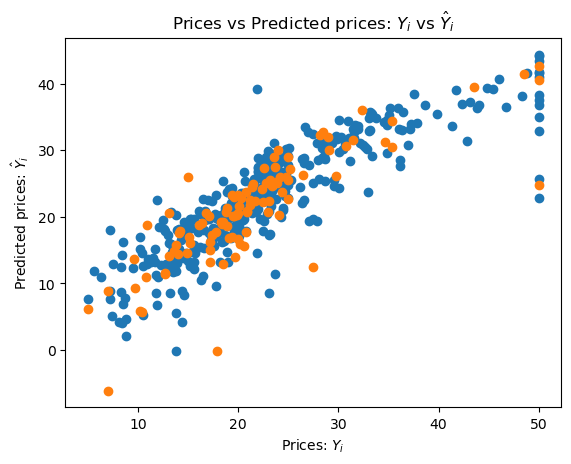

In [24]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [25]:
mean_squared_error(y_test, y_pred)

24.291119474973527

In [26]:
lin_reg.score(X_test, y_test)

0.6687594935356318

Model nieliniowy

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

polynomial_features = PolynomialFeatures(degree=2)
X_train = polynomial_features.fit_transform(X_train)
X_test = polynomial_features.transform(X_test)

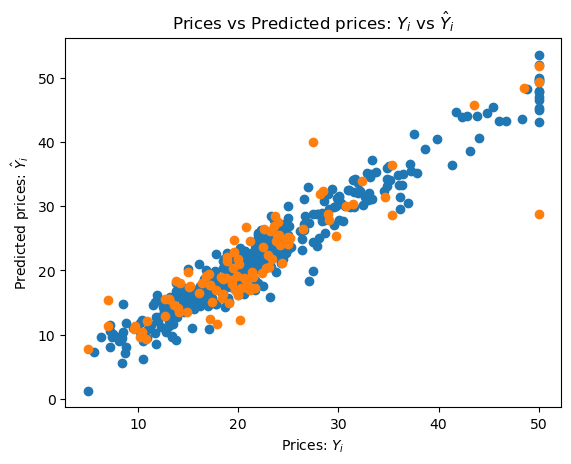

In [28]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [29]:
mean_squared_error(y_test, y_pred)

14.183558170387018

In [30]:
lin_reg.score(X_test, y_test)

0.8065890295148308

Lasso model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

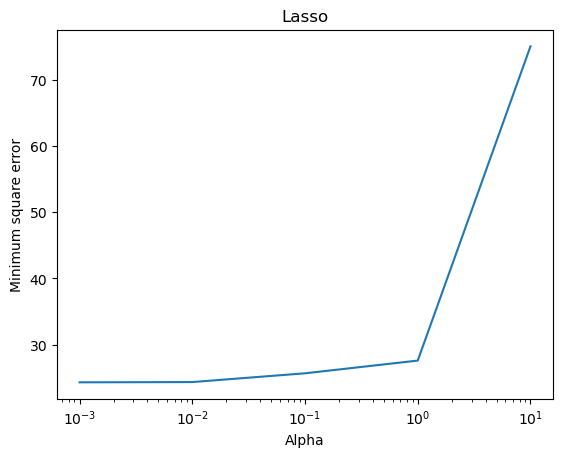

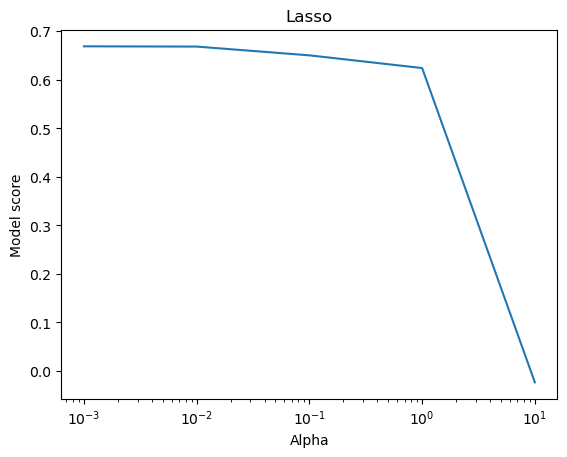

In [32]:
mse_arr = []
score_arr = []
alpha_arr = [0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_arr:
    lasso = Lasso(alpha=alpha, random_state=42).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    y_train_pred = lasso.predict(X_train)
    mse_arr.append(mean_squared_error(y_test, y_pred))
    score_arr.append(lasso.score(X_test, y_test))

plt.semilogx(alpha_arr, mse_arr)
plt.xlabel('Alpha')
plt.ylabel("Minimum square error")
plt.title('Lasso')
plt.show()

plt.semilogx(alpha_arr, score_arr)
plt.xlabel('Alpha')
plt.ylabel("Model score")
plt.title('Lasso')
plt.show()

Ridge model

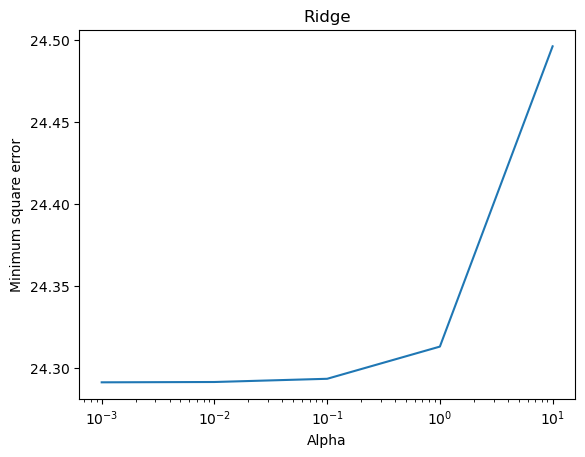

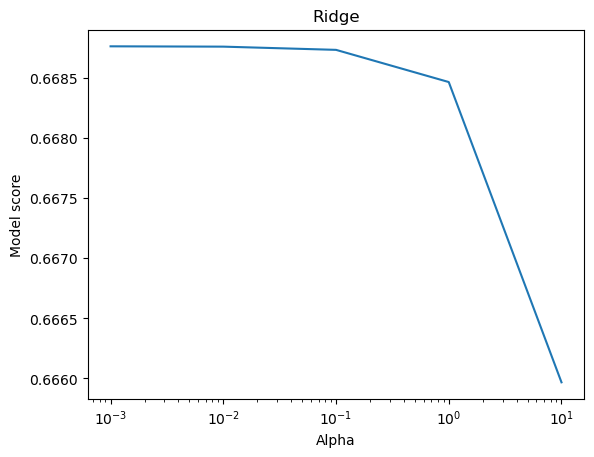

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

mse_arr2 = []
score_arr2 = []
alpha_arr = [0.001, 0.01, 0.1, 1, 10]
for alpha in alpha_arr:
    ridge = Ridge(alpha=alpha, random_state=42).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    y_train_pred = ridge.predict(X_train)
    mse_arr2.append(mean_squared_error(y_test, y_pred))
    score_arr2.append(ridge.score(X_test, y_test))

plt.semilogx(alpha_arr, mse_arr2)
plt.xlabel('Alpha')
plt.ylabel("Minimum square error")
plt.title('Ridge')
plt.show()

plt.semilogx(alpha_arr, score_arr2)
plt.xlabel('Alpha')
plt.ylabel("Model score")
plt.title('Ridge')
plt.show()

Dataset A

In [34]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [35]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

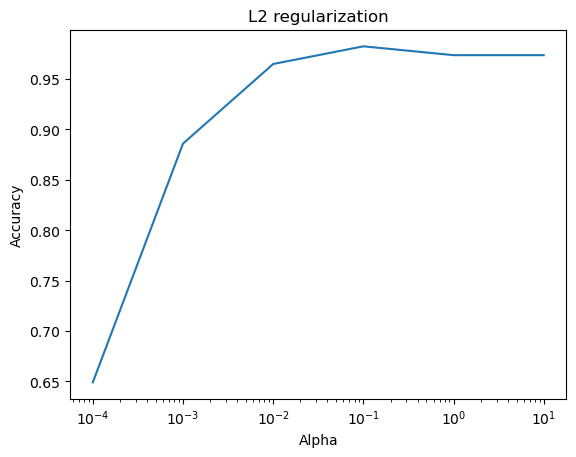

In [36]:
alpha_arr = [0.0001, 0.001, 0.01, 0.1, 1, 10]
acc_arr = []

for alpha in alpha_arr:
    log_reg = LogisticRegression(penalty='l2', C=alpha, max_iter=1000).fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    acc_arr.append(log_reg.score(X_test, y_test))

plt.semilogx(alpha_arr, acc_arr)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('L2 regularization')
plt.show()